In [52]:
import scipy
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
from matplotlib import pyplot as plt
#make matplotlib appear in the notebook rather than in a new window
%matplotlib inline 

# 1. Distributions: 
how to get to know better the distribution of the data, identify various issues, and check fits?

## 1.1. Probability distributions

Ex 1. QQ-PLOT BASICS. 

First, simulate 9 times 200 standard random normal variables, and inspect the variations in the qq-plots.
Take a look at the help of qqplots in the statmodels.api module of Python using sm.qqplot? if necessary.

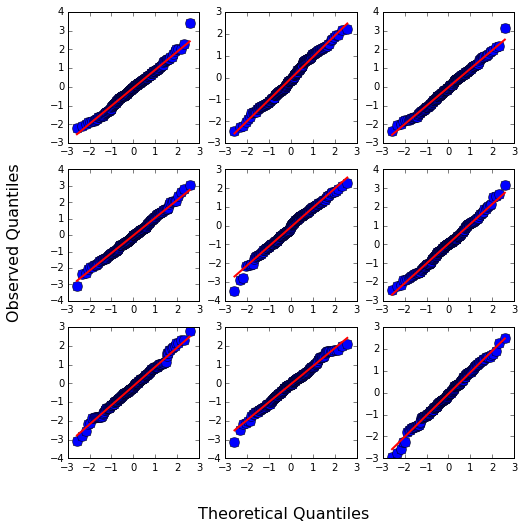

In [53]:
fig = plt.figure(1,figsize=(8,8))
for ii in range(1, 10):
    rv = scipy.stats.norm.rvs(0, 1, size = 200)
    ax = fig.add_subplot(3,3,ii)
    sm.qqplot(rv, line = 's', ax = ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
fig.text(0.5, 0.02, 'Theoretical Quantiles', ha='center',size=16)
fig.text(0.02, 0.5, 'Observed Quantiles', va='center', rotation='vertical',size=16)
plt.show()

Ex 2. LINEARITY OF THE NORMAL DISTRIBUTION. 

Repeat the exercise using random normal variables with mean 3 and standard deviation 0.4, using now 3 times each of 4,20 and 200.

The automatically added line on the qq-plot is estimated by taking the empirical mean and square-root empirical variance of the sample; these are the simplest estimators of the parameters of a normal sample. For a normal distribution, if X ~ N(0,1), then the variable  Y = m + sX ~ N(m, s^2). Therefore, if you plotted your sample Y against standard normal quantiles, a line using the true mean m as intersect and the true standard deviation s as slope should represent the truth, and probably should fit the sample well. 

Add a line with intersection 3 and slope 0.4 (representing the n = Infty perfect sample). Are the empirical mean and variance good estimators of the population mean and variance?   

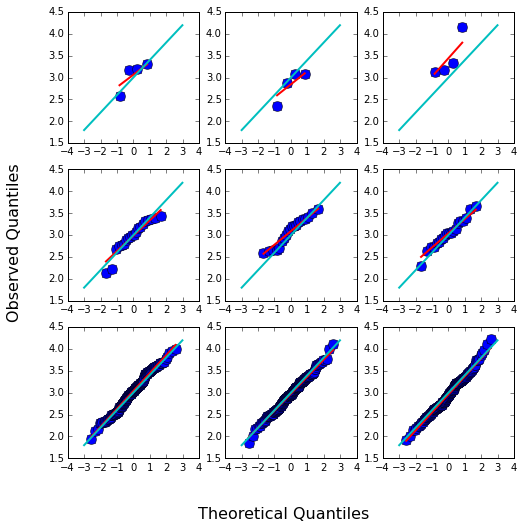

In [54]:
x = np.arange(-3.,3.,0.01)
y = 3. + 0.4*x
nsample = [4,4,4,20,20,20,200,200,200]
fig = plt.figure(1,figsize=(8,8))
for ii in range(0,9):
    rv = scipy.stats.norm.rvs(3., 0.4, size = nsample[ii])
    ax = fig.add_subplot(3,3,ii+1)
    sm.qqplot(rv, line = 's', ax = ax)
    ax.plot(x, y, color='c')
    ax.set_xlabel('')
    ax.set_ylabel('')
fig.text(0.5, 0.02, 'Theoretical Quantiles', ha='center',size=16)
fig.text(0.02, 0.5, 'Observed Quantiles', va='center', rotation='vertical',size=16)
plt.show()

Ex 3. RECOGNIZE DISTRIBUTIONAL FEATURES ON THE QQ-PLOTS.

The qq-plot provides a powerful check of distributional assumptions. Use the template below to see the following distributions: Cauchy (heavy-tailed), chi-squared (much used), beta(0.5,2) (restricted to the interval [0,1]; contains the uniform distribution as beta(1,1)) and two Poisson distributions, with mean 3 and 250. 

This time, we use the option fit = True in sm.qqplot, so that the sample is standardized by its mean and standard error before plotting. 

Replace the random distribution in the codes, both for the comparison with the normal distribution and for the qq-plot (check the parameters at http://docs.scipy.org/doc/scipy/reference/stats.html). Compare the tail behavior on the plot of the density and on the qq-plot. 

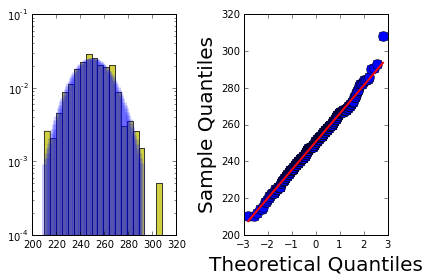

In [55]:
#uncomment for cauchy
#x = np.linspace(scipy.stats.cauchy.ppf(0.005), scipy.stats.cauchy.ppf(0.995), 200)

#uncomment for poisson
x = np.arange(scipy.stats.poisson.ppf(0.005, mu=250), scipy.stats.poisson.ppf(0.995, mu=250), 1)

#uncomment for cauchy
#rv = scipy.stats.cauchy.rvs(size = 400)

#uncomment for poisson
rv = scipy.stats.poisson.rvs(mu=250,size=400)

fig = plt.figure(3)
ax1 = fig.add_subplot(121)
plt.hist(rv, 20, normed=1, facecolor='y', alpha=0.75)
#uncomment for cauchy
#ax1.plot(x, scipy.stats.cauchy.pdf(x),'b-', lw=2)
ax1.set_yscale('log')
#uncomment for poission
ax1.vlines(x, 0, scipy.stats.poisson.pmf(x, mu=250), colors='b', lw=5, alpha=0.2)
ax2 = fig.add_subplot(122)
sm.qqplot(rv, line = 's', ax = ax2)
fig.tight_layout()
plt.show()

# To see the extremes of the random variates:
#rv.min()
#rv.max()

Lets do a set of 9 similar to the above observations to demonstrate how small amounts of data can generate misleading conclusions --

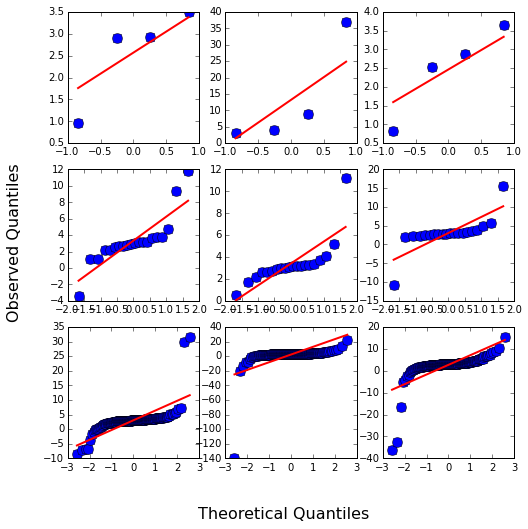

In [56]:
nsample = [4,4,4,20,20,20,200,200,200]
fig = plt.figure(1,figsize=(8,8))
for ii in range(0,9):
    rv = scipy.stats.cauchy.rvs(3., 0.4, size = nsample[ii])
    ax = fig.add_subplot(3,3,ii+1)
    sm.qqplot(rv, line = 's', ax = ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
fig.text(0.5, 0.02, 'Theoretical Quantiles', ha='center',size=16)
fig.text(0.02, 0.5, 'Observed Quantiles', va='center', rotation='vertical',size=16)
plt.show()

## 1.2. Estimating the parameters and an (incomplete) collection of frequent problems

We will walk through some of the simplest complications that can affect real data, and see how to recognize them by the means of the quantile-quantile plot.

Ex. 4. NUISANCES IN THE DATA

(starter's guide for dataframes in pandas: http://pandas.pydata.org/pandas-docs/stable/dsintro.html, as well as http://www.scipy-lectures.org/packages/statistics/index.html)

4.1. Outliers

In [57]:
dfr = pd.read_csv("./data/IntroStat_demo.csv")

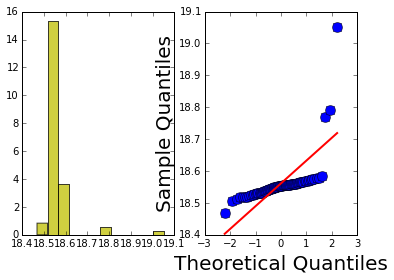

In [58]:
fig = plt.figure(1)

plt.subplot(121)
n, bins, patches = plt.hist(dfr['mag.outlier'], 12, normed=1, facecolor='y', alpha=0.75)
ax = fig.add_subplot(122)
sm.qqplot(dfr['mag.outlier'], line = 's', ax = ax)

plt.show()

Replace the line by one defined using the quantile estimators (a line passing through the first and third quartiles).

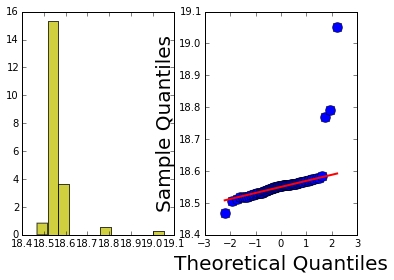

In [59]:
fig = plt.figure(1)

plt.subplot(121)
plt.hist(dfr['mag.outlier'], 12, normed=1, facecolor='y', alpha=0.75)
ax = fig.add_subplot(122)
sm.qqplot(dfr['mag.outlier'], line = 'q', ax = ax)

plt.show()

Some robust (regression) models, M-estimators: http://statsmodels.sourceforge.net/stable/rlm.html.

4.2. Heteroscedasticity

Use now the 'mag.het' column in place of 'mag.outlier'. Does the quantile-based or the moment-estimated line work?

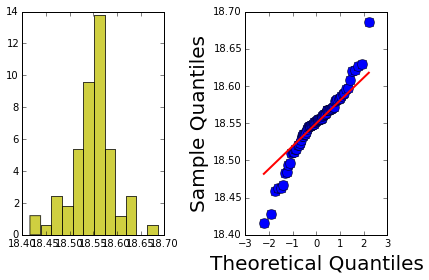

In [60]:
fig = plt.figure(1)

plt.subplot(121)
plt.hist(dfr['mag.het'], 12, normed=1, facecolor='y', alpha=0.75)
ax = fig.add_subplot(122)
sm.qqplot(dfr['mag.het'], line = 'q', ax = ax)
fig.tight_layout()
plt.show()

The sample is, in fact, heteroscedastic, and the (estimated) standard errors are given in the column 'mag.het.error'.
What can you do to check about the errors if you are in doubt about them? How can you check the normality of the sample?

In [61]:
def std_fn(x, mean, std):
    res = (x-mean) / std
    return res

The above standardization should lead to a homoscedastic standard normal sample (by the linearity of the normal distribution). Its QQ-plot should be now close to a line with slope 1.

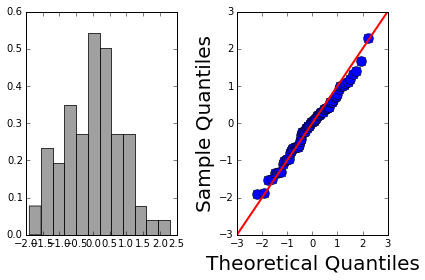

In [62]:

w = dfr['mag.het.error']**(-2)
m = np.average(dfr['mag.het'], weights = w)
std_het = std_fn(x = dfr['mag.het'], mean = m, std = dfr['mag.het.error'])

fig = plt.figure(1)
plt.subplot(121)
plt.hist(std_het, 12, normed=1, facecolor='grey', alpha=0.75)
ax = fig.add_subplot(122)
# The option line = '45' means a line with intersection 0 and slope 1.
sm.qqplot(std_het, line = '45', ax = ax)
fig.tight_layout()
plt.show()

4.3. Any other uexpected effect

Use now the 'mag5' column in place of 'mag.outlier'. How does the standardization work in this case?

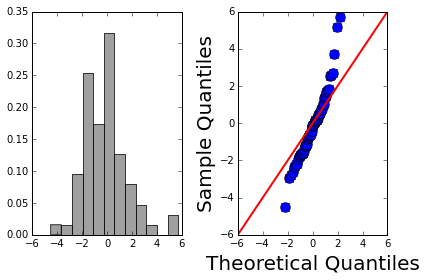

In [63]:
w = dfr['mag5.error']**(-2)
m = np.average(dfr['mag5'], weights = w)
std5 = std_fn(x = dfr['mag5'], mean = m, std = dfr['mag5.error'])

fig = plt.figure(1)
plt.subplot(121)
plt.hist(std5, 12, normed=1, facecolor='grey', alpha=0.75)
ax = fig.add_subplot(122)
sm.qqplot(std5, line = '45', ax = ax)
fig.tight_layout()
plt.show()

Use the 'time' column in the dataframe to plot the data.

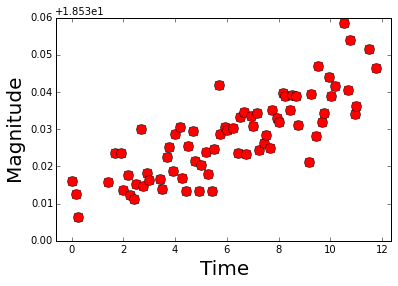

In [64]:
fig = plt.figure(1)

plt.plot(dfr['time'], dfr['mag5'], 'ro')

plt.xlabel('Time')
plt.ylabel('Magnitude')
# this is just to extend a bit the plotting area, so that no points fall exactly on the border:
mn, mx = sorted(dfr['time'])[::len(dfr['time'])-1]
plt.xlim(mn - 0.05*(mx-mn), mx + 0.05*(mx-mn))

plt.show()

# 2. Classical estimation and hypothesis testing

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. We'll try to estimate their period-luminosity relationship.
The Wesenheit index is defined as W = I - 1.55(V - I), and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. Other columns are 
'name', the identifier of the star; 
'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 
'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 
'Cloud', indicating which Magellanic Cloud the star belongs to; 
'logP1', the base-10 logarithm of the period in days; 
'VI', the colour V-I.  

Ex. 5. ORDINARY LEAST SQUARES REGRESSION (= GAUSSIAN MAXIMUM LIKELIHOOD WITH A MEAN DEPENDING ON A COVARIATE)

5.1 MODEL FIT

There are fundamental-mode (FU) and first overtone (FO) Cepheids both from the SMC and the LMC. Represent the fundamental and first overtone Cepheids' P-L relationship (W versus logP1) in two separate scatterplots, the LMC and SMC stars with different colours. What do you see? Fit a separate linear regression model to each of the distinct groups (to check the content of the resulting objects 'lmfit_lmc_fu' etc., see with dir(lmfit_lmc_fu) ). How would you decide whether the slopes are the same for stars of the same mode in the two Clouds? 

In [65]:
import statsmodels.formula.api as smf

In [66]:
cep = pd.read_csv("./data/Cepheids.csv")
cep[0:10]

,name,RA0,Decl0,Mode,Cloud,W,logP1,VI
0,OGLE-LMC-CEP-0002,4.529733,-69.81933,F,LMC,14.52500,0.493893,0.740
1,OGLE-LMC-CEP-0005,4.592089,-69.73497,F,LMC,13.49540,0.749122,0.752
2,OGLE-LMC-CEP-0012,4.630203,-67.21442,F,LMC,14.54210,0.424912,0.598
3,OGLE-LMC-CEP-0016,4.642367,-67.64631,F,LMC,12.03300,1.021456,1.080
4,OGLE-LMC-CEP-0017,4.649119,-69.68839,F,LMC,14.34215,0.565524,0.647
5,OGLE-LMC-CEP-0018,4.649717,-68.95689,F,LMC,13.93705,0.607225,0.829
6,OGLE-LMC-CEP-0021,4.658600,-69.26183,F,LMC,13.53005,0.737032,0.769
7,OGLE-LMC-CEP-0023,4.679856,-68.98564,F,LMC,15.21055,0.230915,0.719
8,OGLE-LMC-CEP-0025,4.681769,-69.11508,F,LMC,14.08130,0.572116,0.814
9,OGLE-LMC-CEP-0026,4.686733,-68.79975,F,LMC,14.51275,0.410047,0.615


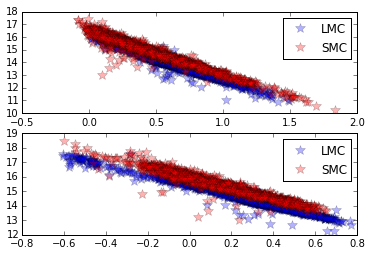

In [67]:
i_lmc = cep['Cloud'] == "LMC"
i_fu = cep['Mode'] == "F"

fig = plt.figure(4)
ax1 = fig.add_subplot(211)
plt.plot(cep[i_lmc & i_fu]['logP1'], cep[i_lmc & i_fu]['W'], 'b*', alpha=0.3, label = 'LMC')
plt.plot(cep[-i_lmc & i_fu]['logP1'], cep[-i_lmc & i_fu]['W'], 'r*', alpha=0.3, label = 'SMC')
plt.legend(loc = 'best', numpoints = 1)
ax2 = fig.add_subplot(212)
plt.plot(cep[i_lmc & -i_fu]['logP1'], cep[i_lmc & -i_fu]['W'], 'b*', alpha=0.3, label = 'LMC')
plt.plot(cep[-i_lmc & -i_fu]['logP1'], cep[-i_lmc & -i_fu]['W'], 'r*', alpha=0.3, label = 'SMC')
plt.legend(loc = 'best', numpoints = 1)

plt.show()

In [68]:
lmfit_lmc_fu = smf.ols(formula = 'W ~ logP1', data = cep, subset = i_lmc & i_fu).fit()
lmfit_lmc_fo = smf.ols(formula = 'W ~ logP1', data = cep, subset = i_lmc & -i_fu).fit()

lmfit_smc_fu = smf.ols(formula = 'W ~ logP1', data = cep, subset = -i_lmc & i_fu).fit()
lmfit_smc_fo = smf.ols(formula = 'W ~ logP1', data = cep, subset = -i_lmc & -i_fu).fit()

In [69]:
print lmfit_smc_fo.summary()

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.835e+04
Date:                Tue, 02 Aug 2016   Prob (F-statistic):               0.00
Time:                        10:20:36   Log-Likelihood:                 108.98
No. Observations:                1632   AIC:                            -214.0
Df Residuals:                    1630   BIC:                            -203.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.9624      0.007   2428.764      0.0

In [70]:
cep['resid0'] = np.zeros(cep.shape[0])
cep['fitted0'] = np.zeros(cep.shape[0])
cep.loc[(i_lmc & i_fu),'resid0'] = lmfit_lmc_fu.resid
cep.loc[(-i_lmc & i_fu),'resid0'] = lmfit_smc_fu.resid
cep.loc[(i_lmc & -i_fu),'resid0'] = lmfit_lmc_fo.resid
cep.loc[(-i_lmc & -i_fu),'resid0'] = lmfit_smc_fo.resid
cep.loc[(i_lmc & i_fu),'fitted0'] = lmfit_lmc_fu.fittedvalues
cep.loc[(-i_lmc & i_fu),'fitted0'] = lmfit_smc_fu.fittedvalues
cep.loc[(i_lmc & -i_fu),'fitted0'] = lmfit_lmc_fo.fittedvalues
cep.loc[(-i_lmc & -i_fu),'fitted0'] = lmfit_smc_fo.fittedvalues

cep.iloc[0:10]

,name,RA0,Decl0,Mode,Cloud,W,logP1,VI,resid0,fitted0
0,OGLE-LMC-CEP-0002,4.529733,-69.81933,F,LMC,14.52500,0.493893,0.740,0.274760,14.250240
1,OGLE-LMC-CEP-0005,4.592089,-69.73497,F,LMC,13.49540,0.749122,0.752,0.094023,13.401377
2,OGLE-LMC-CEP-0012,4.630203,-67.21442,F,LMC,14.54210,0.424912,0.598,0.062439,14.479661
3,OGLE-LMC-CEP-0016,4.642367,-67.64631,F,LMC,12.03300,1.021456,1.080,-0.462625,12.495625
4,OGLE-LMC-CEP-0017,4.649119,-69.68839,F,LMC,14.34215,0.565524,0.647,0.330146,14.012004
5,OGLE-LMC-CEP-0018,4.649717,-68.95689,F,LMC,13.93705,0.607225,0.829,0.063738,13.873312
6,OGLE-LMC-CEP-0021,4.658600,-69.26183,F,LMC,13.53005,0.737032,0.769,0.088461,13.441589
7,OGLE-LMC-CEP-0023,4.679856,-68.98564,F,LMC,15.21055,0.230915,0.719,0.085676,15.124874
8,OGLE-LMC-CEP-0025,4.681769,-69.11508,F,LMC,14.08130,0.572116,0.814,0.091221,13.990079
9,OGLE-LMC-CEP-0026,4.686733,-68.79975,F,LMC,14.51275,0.410047,0.615,-0.016350,14.529100


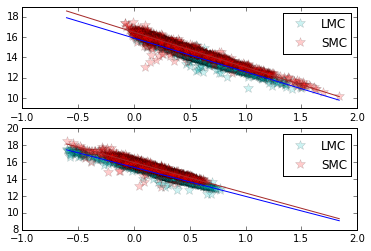

In [87]:
logp_tmp = np.linspace(cep['logP1'].min(), cep['logP1'].max(), 500)

fig = plt.figure(4)
ax1 = fig.add_subplot(211)
plt.plot(cep[i_lmc & i_fu]['logP1'], cep[i_lmc & i_fu]['W'], 'c*', alpha=0.2, label = 'LMC')
plt.plot(cep[-i_lmc & i_fu]['logP1'], cep[-i_lmc & i_fu]['W'], 'r*', alpha=0.2, label = 'SMC')
plt.plot(logp_tmp, lmfit_lmc_fu.params['Intercept'] + logp_tmp * lmfit_lmc_fu.params['logP1'], 'blue', lw = 1)
plt.plot(logp_tmp, lmfit_smc_fu.params['Intercept'] + logp_tmp * lmfit_smc_fu.params['logP1'], 'brown', lw = 1)
plt.legend(loc = 'best', numpoints = 1)
ax2 = fig.add_subplot(212)
plt.plot(cep[i_lmc & -i_fu]['logP1'], cep[i_lmc & -i_fu]['W'], 'c*', alpha=0.2, label = 'LMC')
plt.plot(cep[-i_lmc & -i_fu]['logP1'], cep[-i_lmc & -i_fu]['W'], 'r*', alpha=0.2, label = 'SMC')
plt.legend(loc = 'best', numpoints = 1)
plt.plot(logp_tmp, lmfit_lmc_fo.params['Intercept'] + logp_tmp * lmfit_lmc_fo.params['logP1'], 'blue', lw = 1)
plt.plot(logp_tmp, lmfit_smc_fo.params['Intercept'] + logp_tmp * lmfit_smc_fo.params['logP1'], 'brown', lw = 1)

plt.show()

5.2 MODEL DIAGNOSTICS: QQ-PLOT OF RESIDUALS

Let's start with checking the distributional assumptions of the model: do the residuals  admit a normal distribution? Take a look at the output of the four linear models ( lmobject.summary() ). Can you see indications there of non-normality? Make and inspect the QQ-plot of the residuals, separately for the four groups of Cepheids. What do you find? What can be the reason of what you observe?

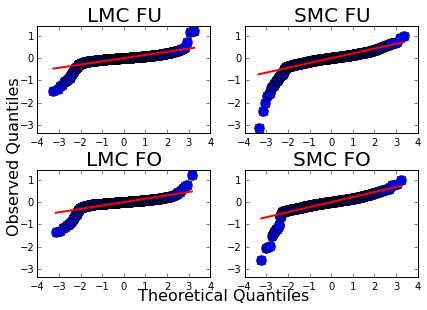

In [91]:
mn, mx = sorted(cep['resid0'])[::len(cep['resid0'])-1]

fig = plt.figure(1)
plt.subplots_adjust(left=0.07, bottom=0.08, right=0.95, top=0.95, wspace=None, hspace=0.35)

ax1 = fig.add_subplot(221)
sm.qqplot(cep[i_lmc & i_fu]['resid0'], line = 's', ax = ax1)
plt.title("LMC FU")
plt.ylim(mn - 0.05*(mx-mn), mx + 0.05*(mx-mn))
ax2 = fig.add_subplot(222)
sm.qqplot(cep[-i_lmc & i_fu]['resid0'], line = 's', ax = ax2)
plt.title("SMC FU")
plt.ylim(mn - 0.05*(mx-mn), mx + 0.05*(mx-mn))
ax3 = fig.add_subplot(223)
sm.qqplot(cep[i_lmc & -i_fu]['resid0'], line = 's', ax = ax3)
plt.title("LMC FO")
plt.ylim(mn - 0.05*(mx-mn), mx + 0.05*(mx-mn))
ax4 = fig.add_subplot(224)
sm.qqplot(cep[-i_lmc & -i_fu]['resid0'], line = 's', ax = ax4)

for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.text(0.5, 0.00, 'Theoretical Quantiles', ha='center',size=16)
fig.text(0.00, 0.5, 'Observed Quantiles', va='center', rotation='vertical',size=16)

plt.title("SMC FO")
plt.ylim(mn - 0.05*(mx-mn), mx + 0.05*(mx-mn))
plt.show()

There are a few possible explanations.

1. The Magellanic Clouds are extended in the line of sight. It is possible that we see an effect of the slightly different distances of stars towards the foreground and of those towards background.
2. The literature suggests that the P-L relationship can contain colour (V-I) terms, and can have dependence on metallicity. 
3. There are also suggestions of either a break in the P-L relationships (at log(P) = 1 for FU and at at log(P) = 0.5 for FO) or the inclusion of a quadratic term. 
4. Unidentified effect or naturally non-normally distributed errors in period and the Wesenheit index.

First we check the first point up there. Create a map of the stars on the sky (plot of RA0 and Decl0), coloured according to the sign of the residuals; if there is an effect of distance, then negative residuals and positive residuals will be differently grouped, and hinting at the geometry of the Cloud. Do this separately for the four fits.

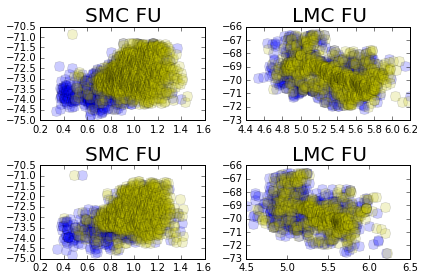

In [92]:
i_posresid = (cep['resid0'] > 0)
    
fig = plt.figure(1)

fig.add_subplot(221)
plt.plot(cep[-i_lmc & i_fu & i_posresid]['RA0'], cep[-i_lmc & i_fu & i_posresid]['Decl0'], 'bo', alpha=0.2)
plt.plot(cep[-i_lmc & i_fu & -i_posresid]['RA0'], cep[-i_lmc & i_fu & -i_posresid]['Decl0'], 'yo', alpha=0.2)
plt.title('SMC FU')

fig.add_subplot(222)
plt.plot(cep[i_lmc & i_fu & i_posresid]['RA0'], cep[i_lmc & i_fu & i_posresid]['Decl0'], 'bo', alpha=0.2)
plt.plot(cep[i_lmc & i_fu & -i_posresid]['RA0'], cep[i_lmc & i_fu & -i_posresid]['Decl0'], 'yo', alpha=0.2)
plt.title('LMC FU')

fig.add_subplot(223)
plt.plot(cep[-i_lmc & -i_fu & i_posresid]['RA0'], cep[-i_lmc & -i_fu & i_posresid]['Decl0'], 'bo', alpha=0.2)
plt.plot(cep[-i_lmc & -i_fu & -i_posresid]['RA0'], cep[-i_lmc & -i_fu & -i_posresid]['Decl0'], 'yo', alpha=0.2)
plt.title('SMC FU')

fig.add_subplot(224)
plt.plot(cep[i_lmc & -i_fu & i_posresid]['RA0'], cep[i_lmc & -i_fu & i_posresid]['Decl0'], 'bo', alpha=0.2)
plt.plot(cep[i_lmc & -i_fu & -i_posresid]['RA0'], cep[i_lmc & -i_fu & -i_posresid]['Decl0'], 'yo', alpha=0.2)
plt.title('LMC FU')

fig.tight_layout()

plt.show()

5.2 RESIDUALS AGAINST FITTED VALUES AND COVARIATE

After concluding on this point, we can do some further checks on the distribution. Statisticians usually check whether the variance of the response (or the residuals) depends on the fitted value. For example, if our response variable should be considered to be a Poisson variable, then its variance would be equal to the mean, which is varying with the covariate(s). Thus, in such a case, plotting the residuals against the fitted values, we would see a band narrow at small fitted values, and widening with increasing fitted values. For a homoscedastic normal distribution, we would find a band of constant width. Other patterns can hint to other distributions. 
Plot the residuals versus the fitted value for each of the four fits. What do you think? Take into account the local number of the data: with more data within some fitted value bin, you see more of the extremes of the local distribution than with fewer data.

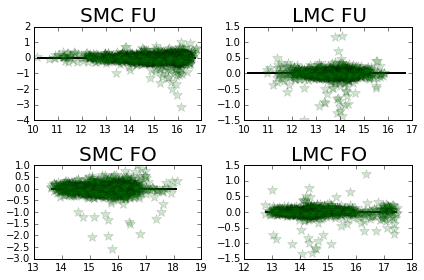

In [93]:
fig = plt.figure(1)

fig.add_subplot(221)
plt.plot(cep[-i_lmc & i_fu]['fitted0'], cep[-i_lmc & i_fu]['resid0'], 'g*', alpha=0.2)
plt.hlines(0, xmin = cep[-i_lmc & i_fu]['fitted0'].min(), xmax = cep[-i_lmc & i_fu]['fitted0'].max(), lw = 2)
plt.title('SMC FU')

fig.add_subplot(222)
plt.plot(cep[i_lmc & i_fu]['fitted0'], cep[i_lmc & i_fu]['resid0'], 'g*', alpha=0.2)
plt.hlines(0, xmin = cep[-i_lmc & i_fu]['fitted0'].min(), xmax = cep[-i_lmc & i_fu]['fitted0'].max(), lw = 2)
plt.title('LMC FU')

fig.add_subplot(223)
plt.plot(cep[-i_lmc & -i_fu]['fitted0'], cep[-i_lmc & -i_fu]['resid0'], 'g*', alpha=0.2)
plt.hlines(0, xmin = cep[-i_lmc & -i_fu]['fitted0'].min(), xmax = cep[-i_lmc & -i_fu]['fitted0'].max(), lw = 2)
plt.title('SMC FO')

fig.add_subplot(224)
plt.plot(cep[i_lmc & -i_fu]['fitted0'], cep[i_lmc & -i_fu]['resid0'], 'g*', alpha=0.2)
plt.hlines(0, xmin = cep[i_lmc & -i_fu]['fitted0'].min(), xmax = cep[i_lmc & -i_fu]['fitted0'].max(), lw = 2)
plt.title('LMC FO')

fig.tight_layout()

plt.show()

Another useful plot (which is generally used) is the plot of residuals against covariates. We can see the intervals of lack of fits, the bias, the necessity of more terms or a nonparametric model. Create this plot. Do you see a strong indication of quadratic terms or breaks in the model?

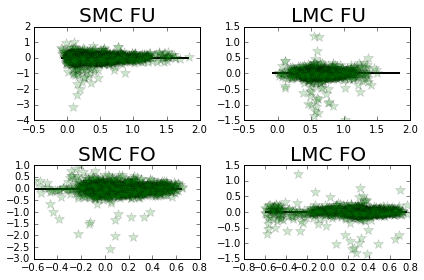

In [94]:
fig = plt.figure(1)

fig.add_subplot(221)
plt.plot(cep[-i_lmc & i_fu]['logP1'], cep[-i_lmc & i_fu]['resid0'], 'g*', alpha=0.2)
plt.hlines(0, xmin = cep[-i_lmc & i_fu]['logP1'].min(), xmax = cep[-i_lmc & i_fu]['logP1'].max(), lw = 2)
plt.title('SMC FU')

fig.add_subplot(222)
plt.plot(cep[i_lmc & i_fu]['logP1'], cep[i_lmc & i_fu]['resid0'], 'g*', alpha=0.2)
plt.hlines(0, xmin = cep[-i_lmc & i_fu]['logP1'].min(), xmax = cep[-i_lmc & i_fu]['logP1'].max(), lw = 2)
plt.title('LMC FU')

fig.add_subplot(223)
plt.plot(cep[-i_lmc & -i_fu]['logP1'], cep[-i_lmc & -i_fu]['resid0'], 'g*', alpha=0.2)
plt.hlines(0, xmin = cep[-i_lmc & -i_fu]['logP1'].min(), xmax = cep[-i_lmc & -i_fu]['logP1'].max(), lw = 2)
plt.title('SMC FO')

fig.add_subplot(224)
plt.plot(cep[i_lmc & -i_fu]['logP1'], cep[i_lmc & -i_fu]['resid0'], 'g*', alpha=0.2)
plt.hlines(0, xmin = cep[i_lmc & -i_fu]['logP1'].min(), xmax = cep[i_lmc & -i_fu]['logP1'].max(), lw = 2)
plt.title('LMC FO')

fig.tight_layout()

plt.show()

5.3 MODEL COMPARISON: IS V-I NECESSARY TO INCLUDE?

Several authors propose the inclusion of a linear V-I term to the P-L relationship in its form using magnitudes of the stars. As we use the Wesenheit index, this is equivalent to allow for a correction term to the used coefficient 1.55 (recall that W = I - 1.55(V - I)). Do we need this term? First visualize.

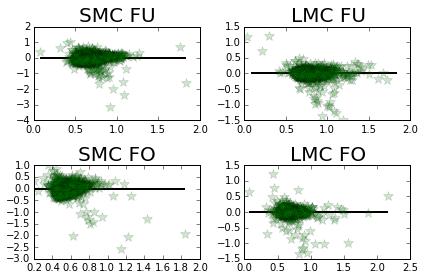

In [95]:
fig = plt.figure(1)

fig.add_subplot(221)
plt.plot(cep[-i_lmc & i_fu]['VI'], cep[-i_lmc & i_fu]['resid0'], 'g*', alpha=0.2)
plt.hlines(0, xmin = cep[-i_lmc & i_fu]['VI'].min(), xmax = cep[-i_lmc & i_fu]['VI'].max(), lw = 2)
plt.title('SMC FU')

fig.add_subplot(222)
plt.plot(cep[i_lmc & i_fu]['VI'], cep[i_lmc & i_fu]['resid0'], 'g*', alpha=0.2)
plt.hlines(0, xmin = cep[-i_lmc & i_fu]['VI'].min(), xmax = cep[-i_lmc & i_fu]['VI'].max(), lw = 2)
plt.title('LMC FU')

fig.add_subplot(223)
plt.plot(cep[-i_lmc & -i_fu]['VI'], cep[-i_lmc & -i_fu]['resid0'], 'g*', alpha=0.2)
plt.hlines(0, xmin = cep[-i_lmc & -i_fu]['VI'].min(), xmax = cep[-i_lmc & -i_fu]['VI'].max(), lw = 2)
plt.title('SMC FO')

fig.add_subplot(224)
plt.plot(cep[i_lmc & -i_fu]['VI'], cep[i_lmc & -i_fu]['resid0'], 'g*', alpha=0.2)
plt.hlines(0, xmin = cep[i_lmc & -i_fu]['VI'].min(), xmax = cep[i_lmc & -i_fu]['VI'].max(), lw = 2)
plt.title('LMC FO')

fig.tight_layout()

plt.show()

Just to check on the literature, to see a frequent and sometimes unnoticed problem of linear models, and to use the model comparison techniques, we fit models with both logP1 and V - I. However, we should be careful. It cannot be excluded that the two explanatory variables directly depend on each other (actually, this can even be expected, since the Cepheids have a very constrained pulsation and stellar structure model). If such a relationship holds between two covariates in a linear model, then mathematically, the model can become ill-determined, and strongly unstable against small changes in the data. This is because in such a case, a change in the coefficient of one of these covariates can be compensated by a corresponding change in the coefficient of the other. So first use a scatterplot to see the logP1-VI relationship in the four Cepheid groups. What do you conclude?

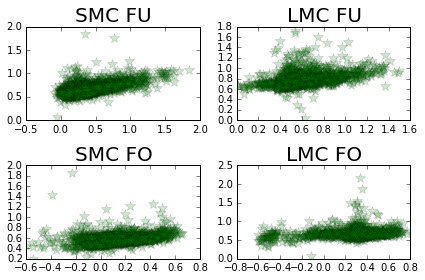

In [96]:
fig = plt.figure(1)

fig.add_subplot(221)
plt.plot(cep[-i_lmc & i_fu]['logP1'], cep[-i_lmc & i_fu]['VI'], 'g*', alpha=0.2)
plt.title('SMC FU')

fig.add_subplot(222)
plt.plot(cep[i_lmc & i_fu]['logP1'], cep[i_lmc & i_fu]['VI'], 'g*', alpha=0.2)
plt.title('LMC FU')

fig.add_subplot(223)
plt.plot(cep[-i_lmc & -i_fu]['logP1'], cep[-i_lmc & -i_fu]['VI'], 'g*', alpha=0.2)
plt.title('SMC FO')

fig.add_subplot(224)
plt.plot(cep[i_lmc & -i_fu]['logP1'], cep[i_lmc & -i_fu]['VI'], 'g*', alpha=0.2)
plt.title('LMC FO')

fig.tight_layout()

plt.show()

This problem is called the collinearity problem. A solution is to orthogonalize the variables; we perform this by regressing VI on logP1, and extracting the residuals of this model. The residuals now, by virtue of some statistical magic, are now uncorrelated with logP1, and can be used in a two-variate period-luminosity-color relationship without the risk of ending up with a singular model.
After fitting, check up on the significance table of the model parameters. 

In [78]:
vi_lmfit_lmc_fu = smf.ols(formula = 'VI ~ logP1', data = cep, subset = i_lmc & i_fu).fit()
vi_lmfit_lmc_fo = smf.ols(formula = 'VI ~ logP1', data = cep, subset = i_lmc & -i_fu).fit()

vi_lmfit_smc_fu = smf.ols(formula = 'VI ~ logP1', data = cep, subset = -i_lmc & i_fu).fit()
vi_lmfit_smc_fo = smf.ols(formula = 'VI ~ logP1', data = cep, subset = -i_lmc & -i_fu).fit()

In [79]:
print vi_lmfit_smc_fo.summary()

                            OLS Regression Results                            
Dep. Variable:                     VI   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     226.5
Date:                Tue, 02 Aug 2016   Prob (F-statistic):           4.91e-48
Time:                        10:20:40   Log-Likelihood:                 1500.5
No. Observations:                1632   AIC:                            -2997.
Df Residuals:                    1630   BIC:                            -2986.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5593      0.003    199.634      0.0

Next, add the new column 'resid_vi' as an additional variable to the models. Compare the different model comparison measures: the likelihood, the AIC and the BIC to those of models without resid_vi. As well, repeat the former plot, now superposing the new residuals in a new (transparent) colour. What do you see? Would you accept the necessity of including such a term into your models? Consider different aspects of the problem: improvement on the model as goodness-of-fit measures summarize, behaviour of the residuals, behaviour of the outliers, size of the effect, errors on the coefficients in the two models.  

In [80]:
cep['resid_vi'] = np.zeros(cep.shape[0])
cep.loc[(i_lmc & i_fu),'resid_vi'] = vi_lmfit_lmc_fu.resid
cep.loc[(-i_lmc & i_fu),'resid_vi'] = vi_lmfit_smc_fu.resid
cep.loc[(i_lmc & -i_fu),'resid_vi'] = vi_lmfit_lmc_fo.resid
cep.loc[(-i_lmc & -i_fu),'resid_vi'] = vi_lmfit_smc_fo.resid

In [81]:
cep[0:10]

,name,RA0,Decl0,Mode,Cloud,W,logP1,VI,resid0,fitted0,resid_vi
0,OGLE-LMC-CEP-0002,4.529733,-69.81933,F,LMC,14.52500,0.493893,0.740,0.274760,14.250240,-0.026589
1,OGLE-LMC-CEP-0005,4.592089,-69.73497,F,LMC,13.49540,0.749122,0.752,0.094023,13.401377,-0.073301
2,OGLE-LMC-CEP-0012,4.630203,-67.21442,F,LMC,14.54210,0.424912,0.598,0.062439,14.479661,-0.152721
3,OGLE-LMC-CEP-0016,4.642367,-67.64631,F,LMC,12.03300,1.021456,1.080,-0.462625,12.495625,0.192053
4,OGLE-LMC-CEP-0017,4.649119,-69.68839,F,LMC,14.34215,0.565524,0.647,0.330146,14.012004,-0.136067
5,OGLE-LMC-CEP-0018,4.649717,-68.95689,F,LMC,13.93705,0.607225,0.829,0.063738,13.873312,0.036341
6,OGLE-LMC-CEP-0021,4.658600,-69.26183,F,LMC,13.53005,0.737032,0.769,0.088461,13.441589,-0.053519
7,OGLE-LMC-CEP-0023,4.679856,-68.98564,F,LMC,15.21055,0.230915,0.719,0.085676,15.124874,0.012905
8,OGLE-LMC-CEP-0025,4.681769,-69.11508,F,LMC,14.08130,0.572116,0.814,0.091221,13.990079,0.029417
9,OGLE-LMC-CEP-0026,4.686733,-68.79975,F,LMC,14.51275,0.410047,0.615,-0.016350,14.529100,-0.132302


In [82]:
lmfit_lmc_fu2 = smf.ols(formula = 'W ~ logP1 + resid_vi', data = cep, subset = i_lmc & i_fu).fit()
lmfit_lmc_fo2 = smf.ols(formula = 'W ~ logP1 + resid_vi', data = cep, subset = i_lmc & -i_fu).fit()

lmfit_smc_fu2 = smf.ols(formula = 'W ~ logP1 + resid_vi', data = cep, subset = -i_lmc & i_fu).fit()
lmfit_smc_fo2 = smf.ols(formula = 'W ~ logP1 + resid_vi', data = cep, subset = -i_lmc & -i_fu).fit()

In [83]:
print lmfit_lmc_fu2.summary()

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 2.280e+04
Date:                Tue, 02 Aug 2016   Prob (F-statistic):               0.00
Time:                        10:20:40   Log-Likelihood:                 960.12
No. Observations:                1806   AIC:                            -1914.
Df Residuals:                    1803   BIC:                            -1898.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.8929      0.010   1584.215      0.0

In [84]:
print lmfit_lmc_fo.bic
print lmfit_lmc_fo2.bic

-1126.47644923
-1154.2452576


Finally, for seeing how collinearity affects the model results, we fit models also using the original V-I, correlated with log(P). 

In [85]:
lmfit_lmc_fu1 = smf.ols(formula = 'W ~ logP1 + VI', data = cep, subset = i_lmc & i_fu).fit()
lmfit_lmc_fo1 = smf.ols(formula = 'W ~ logP1 + VI', data = cep, subset = i_lmc & -i_fu).fit()

lmfit_smc_fu1 = smf.ols(formula = 'W ~ logP1 + VI', data = cep, subset = -i_lmc & i_fu).fit()
lmfit_smc_fo1 = smf.ols(formula = 'W ~ logP1 + VI', data = cep, subset = -i_lmc & -i_fu).fit()

In [86]:
print lmfit_lmc_fu1.summary()
print lmfit_lmc_fu2.summary()

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 2.280e+04
Date:                Tue, 02 Aug 2016   Prob (F-statistic):               0.00
Time:                        10:20:40   Log-Likelihood:                 960.12
No. Observations:                1806   AIC:                            -1914.
Df Residuals:                    1803   BIC:                            -1898.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     16.0083      0.021    778.718      0.0

Comments:

1. The fitted coefficient of VI and resid_vi in the models are the same, as well as their errors. There is no change in the log-likelihood, AIC and BIC either: model goodness is the same.

2. Both the intersect and the coeff of log(P) have changed. We don't know a priori, which is the true value (if exists at all), but the error on both is smaller in the orthogonal models than in the collinear models.

3. Computing the correlation matrix of the parameters, we find no correlation of resid_vi with the other parameters in the W ~ (logP1, resid_vi) model, versus a high correlation of VI with them in the W ~ (logP1, VI) model. This is a manifestation of the fact that in a collinear model, coefficients can take over (at least partly) the role of each other, and thus, their value is more sensitive to particular outliers and structures in the data than in an orthogonal model. 

4. That a correction using V-I causes some improvement on the outliers and on the distributional discrepancy, can also be seen on the values for skewness and kurtosis (for a normal distribution, these should be 0 and 3 respectively), even though the improvement is indeed tiny, and we did not get much closer to satisfy the distributional assumption to have valid asymptotics of the least squares models (using V-I isn't any help of course with the distance effect, and there might be other effects as well, for instance metallicity). The Jarque-Bera test shows the same.

5. The condition number (ratio of the largest and the smallest eigenvalues of the X^T X matrix, where X is the "design matrix", here basically the data matrix with a first column of ones) is smaller in the orthogonalized model than in the collinear one. As a rule of thumb, condition number higher than 30 indicates dangerously strong collinearity. We here do not reach this limit even with the model W ~ (logP1, VI), but still, we can see the improvement on the condition number from this model to the  W ~ (logP1, resid_vi) one.

6. See the log-likelihood surfaces, shown on the slides.

7. Nevertheless, the discrepancy from normally distributed errors is so big that all estimated errors, all asymptotics are useless! 



In case there is still time, or someone finished the exercise very early, here are some more propositions to work on.

Problem 1: Monte Carlo methods for errors on the estimates.

The literature errors given in Soszynski et al 2008 are . 
Do a subsampling: resample n0 stars from the n stars, and estimate again the PL relation (you can work with either the univariate or the bivariate model). Repeat subsampling and estimation R times. Is the distribution of the estimates normal, as the asymptotic theory says about the maximum likelihood estimator? Take the IQR or the MAD as est. of standard deviation, deflate it with the numeric factor sqrt(n0/n): is this consistent with what is given in the literature?

Problem 2: Use heavy-tailed distributions for estimation.

Assuming a (rescaled) t for the error distribution, can you find a plausible value for nu? (Use the qq-plots and the fact that with the right nu, the rescaled t-variates still would show a straight line pattern.) Compute and plot the likelihood. Find an estimate of the parameters and their errors within  are the errors now more realistic? 
